In [ ]:
#import the packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

In [ ]:
#import the kaggle.json to get access to the api
from google.colab import files
files.upload()  # wähle deine kaggle.json.md Datei


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bglemser","key":"1b0d7921dada59101501451e17cb9c72"}'}

In [ ]:
!cat kaggle.json

{"username":"bglemser","key":"1b0d7921dada59101501451e17cb9c72"}

In [ ]:
!pip install kaggle
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"
!chmod 600 /content/kaggle.json


In [ ]:
#download the competition dataset
!kaggle competitions download -c datasciencebowl

 99% 382M/385M [00:03<00:00, 104MB/s] 
100% 385M/385M [00:03<00:00, 121MB/s]


In [ ]:
#unzip the competition dataset

!unzip /content/datasciencebowl.zip


Archive:  /content/datasciencebowl.zip
  inflating: plankton_identification.pdf  
  inflating: sampleSubmission.csv.zip  
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
# unzip the test directory
!unzip test.zip


Streaming output truncated to the last 5000 lines.
  inflating: test/94448.jpg          
  inflating: test/94449.jpg          
  inflating: test/94450.jpg          
  inflating: test/94451.jpg          
  inflating: test/94452.jpg          
  inflating: test/94456.jpg          
  inflating: test/94457.jpg          
  inflating: test/94458.jpg          
  inflating: test/94459.jpg          
  inflating: test/9446.jpg           
  inflating: test/94461.jpg          
  inflating: test/94463.jpg          
  inflating: test/94464.jpg          
  inflating: test/94465.jpg          
  inflating: test/94467.jpg          
  inflating: test/94468.jpg          
  inflating: test/94469.jpg          
  inflating: test/9447.jpg           
  inflating: test/94470.jpg          
  inflating: test/94471.jpg          
  inflating: test/94472.jpg          
  inflating: test/94473.jpg          
  inflating: test/94474.jpg          
  inflating: test/94475.jpg          
  inflating: test/94476.jpg          

In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/trichodesmium_puff/110180.jpg  
  inflating: train/trichodesmium_puff/110182.jpg  
  inflating: train/trichodesmium_puff/110212.jpg  
  inflating: train/trichodesmium_puff/110253.jpg  
  inflating: train/trichodesmium_puff/110463.jpg  
  inflating: train/trichodesmium_puff/110493.jpg  
  inflating: train/trichodesmium_puff/110545.jpg  
  inflating: train/trichodesmium_puff/110562.jpg  
  inflating: train/trichodesmium_puff/11076.jpg  
  inflating: train/trichodesmium_puff/110777.jpg  
  inflating: train/trichodesmium_puff/110808.jpg  
  inflating: train/trichodesmium_puff/110836.jpg  
  inflating: train/trichodesmium_puff/111004.jpg  
  inflating: train/trichodesmium_puff/111043.jpg  
  inflating: train/trichodesmium_puff/111178.jpg  
  inflating: train/trichodesmium_puff/111289.jpg  
  inflating: train/trichodesmium_puff/111345.jpg  
  inflating: train/trichodesmium_puff/111417.jpg  
  inflating: train/trichodesmium

In [ ]:
#print the number of classes

train_dir = "train"  # dein Train-Ordner

# Alle Unterordner (Klassen) zählen
class_folders = [f for f in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, f))]
print("Klassen-Ordner:", class_folders)
print("Anzahl Klassen:", len(class_folders))


Klassen-Ordner: ['amphipods', 'copepod_cyclopoid_oithona', 'appendicularian_straight', 'siphonophore_calycophoran_sphaeronectes', 'protist_star', 'radiolarian_chain', 'fish_larvae_leptocephali', 'hydromedusae_typeF', 'protist_other', 'stomatopod', 'copepod_calanoid_octomoms', 'siphonophore_calycophoran_rocketship_young', 'trichodesmium_bowtie', 'siphonophore_physonect_young', 'copepod_calanoid_eggs', 'protist_dark_center', 'detritus_blob', 'shrimp_caridean', 'pteropod_triangle', 'euphausiids', 'fish_larvae_medium_body', 'diatom_chain_tube', 'decapods', 'ephyra', 'hydromedusae_sideview_big', 'ctenophore_cestid', 'copepod_calanoid_large_side_antennatucked', 'siphonophore_calycophoran_sphaeronectes_stem', 'siphonophore_physonect', 'hydromedusae_typeE', 'appendicularian_s_shape', 'hydromedusae_narcomedusae', 'chaetognath_non_sagitta', 'hydromedusae_haliscera_small_sideview', 'shrimp_zoea', 'acantharia_protist_halo', 'hydromedusae_typeD_bell_and_tentacles', 'siphonophore_partial', 'echinode

In [ ]:
for cls in class_folders:
    cls_path = os.path.join(train_dir, cls)
    num_images = len([f for f in os.listdir(cls_path) if f.endswith((".jpg",".png"))])
    print(f"{cls}: {num_images} Bilder")

amphipods: 49 Bilder
copepod_cyclopoid_oithona: 899 Bilder
appendicularian_straight: 242 Bilder
siphonophore_calycophoran_sphaeronectes: 179 Bilder
protist_star: 113 Bilder
radiolarian_chain: 287 Bilder
fish_larvae_leptocephali: 31 Bilder
hydromedusae_typeF: 61 Bilder
protist_other: 1172 Bilder
stomatopod: 24 Bilder
copepod_calanoid_octomoms: 49 Bilder
siphonophore_calycophoran_rocketship_young: 483 Bilder
trichodesmium_bowtie: 708 Bilder
siphonophore_physonect_young: 21 Bilder
copepod_calanoid_eggs: 173 Bilder
protist_dark_center: 108 Bilder
detritus_blob: 363 Bilder
shrimp_caridean: 49 Bilder
pteropod_triangle: 65 Bilder
euphausiids: 136 Bilder
fish_larvae_medium_body: 85 Bilder
diatom_chain_tube: 500 Bilder
decapods: 55 Bilder
ephyra: 14 Bilder
hydromedusae_sideview_big: 76 Bilder
ctenophore_cestid: 113 Bilder
copepod_calanoid_large_side_antennatucked: 106 Bilder
siphonophore_calycophoran_sphaeronectes_stem: 57 Bilder
siphonophore_physonect: 128 Bilder
hydromedusae_typeE: 14 Bilder


In [ ]:
import os

train_dir = "train"  # Pfad zu deinem Train-Ordner

# Klassen-Ordner ermitteln
class_folders = [f for f in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, f))]

# Anzahl Bilder pro Klasse zählen
image_counts = {}
for cls in class_folders:
    cls_path = os.path.join(train_dir, cls)
    num_images = len([f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))])
    image_counts[cls] = num_images

print(image_counts)


{'amphipods': 49, 'copepod_cyclopoid_oithona': 899, 'appendicularian_straight': 242, 'siphonophore_calycophoran_sphaeronectes': 179, 'protist_star': 113, 'radiolarian_chain': 287, 'fish_larvae_leptocephali': 31, 'hydromedusae_typeF': 61, 'protist_other': 1172, 'stomatopod': 24, 'copepod_calanoid_octomoms': 49, 'siphonophore_calycophoran_rocketship_young': 483, 'trichodesmium_bowtie': 708, 'siphonophore_physonect_young': 21, 'copepod_calanoid_eggs': 173, 'protist_dark_center': 108, 'detritus_blob': 363, 'shrimp_caridean': 49, 'pteropod_triangle': 65, 'euphausiids': 136, 'fish_larvae_medium_body': 85, 'diatom_chain_tube': 500, 'decapods': 55, 'ephyra': 14, 'hydromedusae_sideview_big': 76, 'ctenophore_cestid': 113, 'copepod_calanoid_large_side_antennatucked': 106, 'siphonophore_calycophoran_sphaeronectes_stem': 57, 'siphonophore_physonect': 128, 'hydromedusae_typeE': 14, 'appendicularian_s_shape': 696, 'hydromedusae_narcomedusae': 132, 'chaetognath_non_sagitta': 815, 'hydromedusae_halisce

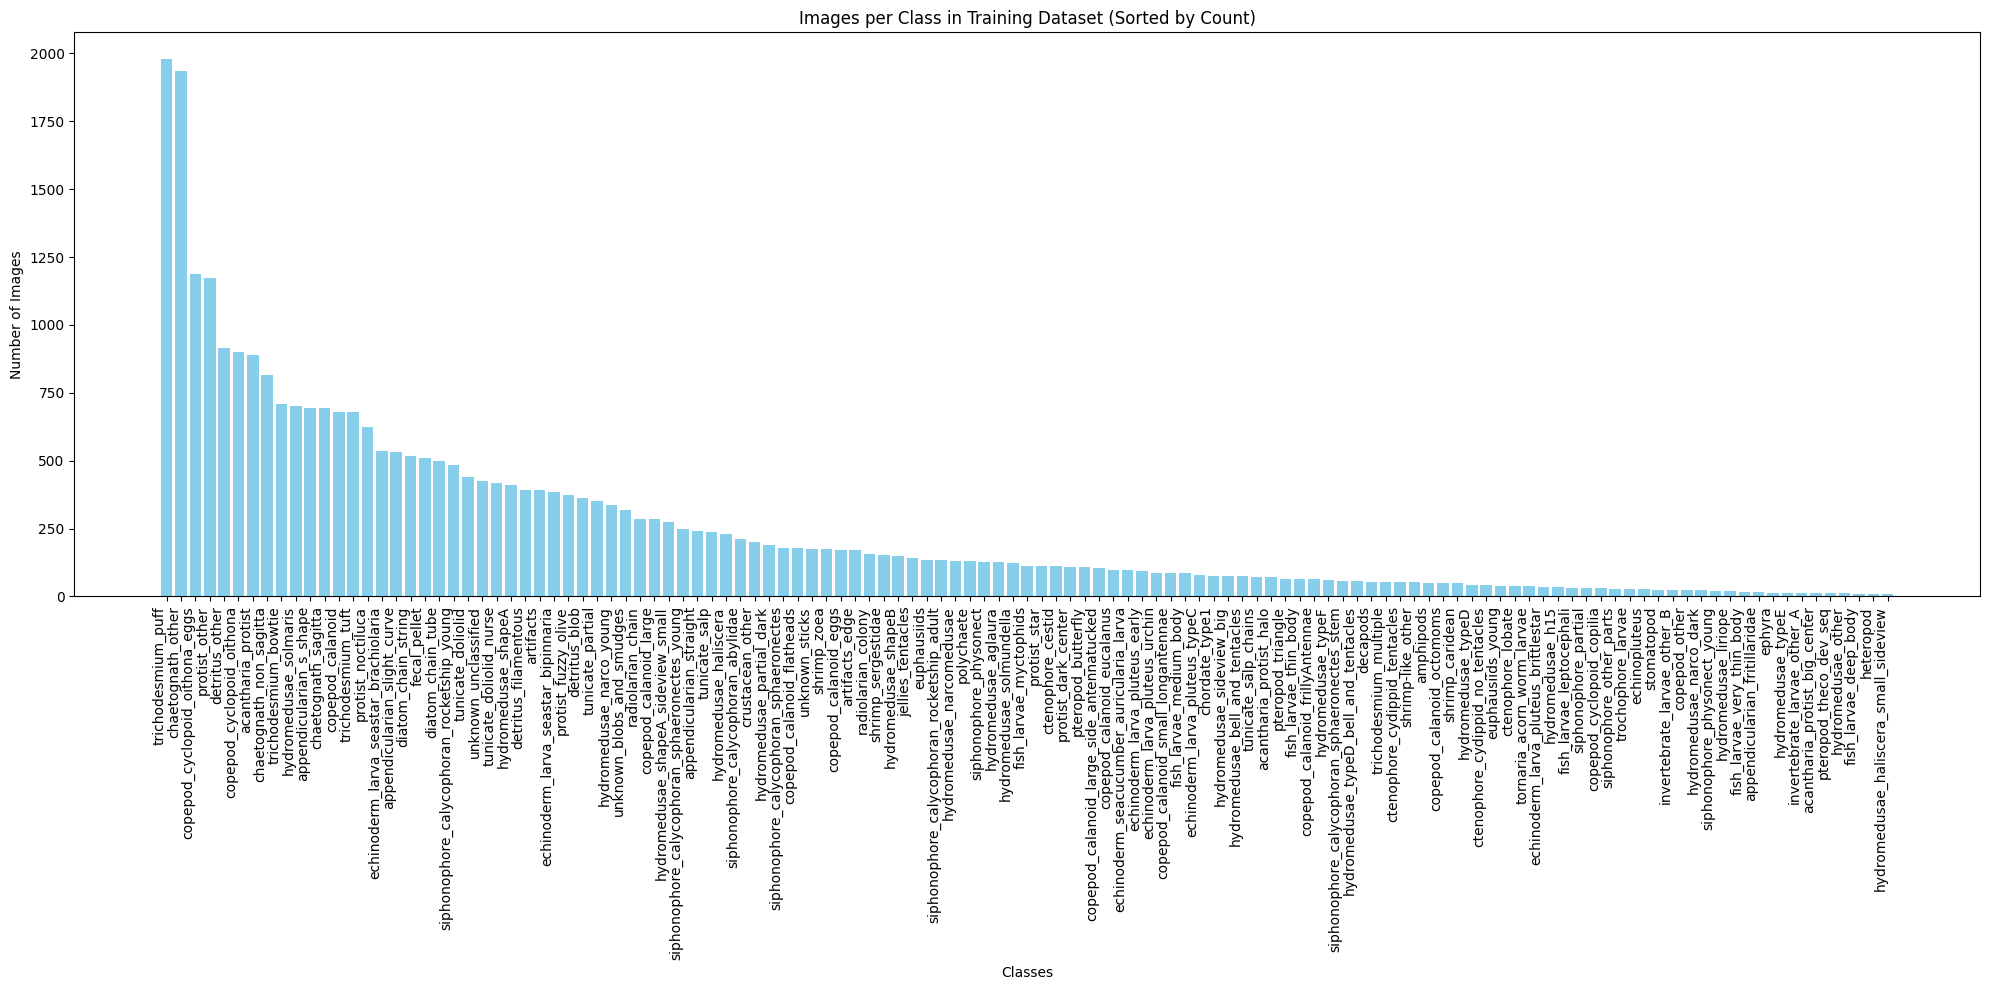

In [ ]:
import matplotlib.pyplot as plt

# Sort image_counts by value (count) in descending order
sorted_image_counts = sorted(image_counts.items(), key=lambda item: item[1], reverse=True)

# Extract sorted classes and counts
classes = [item[0] for item in sorted_image_counts]
counts = [item[1] for item in sorted_image_counts]

# Balkendiagramm erstellen
plt.figure(figsize=(20, 10)) # Increased figure size for better readability with many classes
plt.bar(classes, counts, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Images per Class in Training Dataset (Sorted by Count)")
plt.xticks(rotation=90, ha='right') # Rotate labels and align right for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
max_class = max(image_counts, key=image_counts.get)
max_count = image_counts[max_class]
min_class = min(image_counts, key=image_counts.get)
min_count = image_counts[min_class]

print(f"Class with the most images: {max_class} ({max_count} images)")
print(f"Class with the fewest images: {min_class} ({min_count} images)")

Class with the most images: trichodesmium_puff (1979 images)
Class with the fewest images: hydromedusae_haliscera_small_sideview (9 images)


In [ ]:
#lets print 10 random images from 10 random classes


In [ ]:
#check different image sizes

from PIL import Image
import os

image_sizes = []

for cls in class_folders:
    class_path = os.path.join(train_dir, cls)
    images_in_class = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    for image_name in images_in_class:
        image_path = os.path.join(class_path, image_name)
        try:
            with Image.open(image_path) as img:
                image_sizes.append(img.size)
        except Exception as e:
            print(f"Could not open image {image_name}: {e}")

# Überprüfen, ob alle Bilder die gleiche Größe haben
if not image_sizes:
    print("No images found to check size.")
elif all(size == image_sizes[0] for size in image_sizes):
    print(f"All images have the same size: {image_sizes[0]}")
else:
    unique_sizes = list(set(image_sizes))
    print("Images have different sizes. Unique sizes found:")
    for size in unique_sizes:
        print(size)

Images have different sizes. Unique sizes found:
(206, 217)
(90, 42)
(76, 107)
(296, 147)
(48, 45)
(134, 85)
(227, 47)
(92, 88)
(56, 165)
(83, 268)
(83, 39)
(124, 40)
(69, 104)
(143, 53)
(41, 42)
(44, 47)
(159, 34)
(104, 98)
(85, 48)
(117, 37)
(203, 40)
(62, 101)
(103, 102)
(120, 42)
(106, 107)
(59, 32)
(78, 45)
(97, 58)
(212, 45)
(36, 48)
(55, 61)
(215, 50)
(201, 152)
(113, 39)
(99, 104)
(118, 117)
(71, 42)
(131, 56)
(48, 58)
(166, 50)
(105, 40)
(124, 53)
(160, 235)
(108, 45)
(127, 58)
(168, 59)
(66, 48)
(85, 61)
(43, 64)
(84, 102)
(142, 43)
(166, 171)
(59, 45)
(78, 58)
(110, 239)
(36, 61)
(187, 230)
(195, 54)
(38, 107)
(115, 61)
(54, 51)
(73, 64)
(31, 67)
(191, 56)
(243, 246)
(108, 58)
(75, 110)
(140, 239)
(66, 61)
(112, 177)
(184, 53)
(43, 77)
(84, 115)
(100, 59)
(119, 72)
(58, 62)
(77, 75)
(61, 67)
(80, 80)
(140, 131)
(82, 126)
(376, 115)
(381, 422)
(54, 64)
(73, 77)
(155, 116)
(237, 185)
(75, 123)
(47, 24)
(107, 75)
(112, 190)
(65, 78)
(290, 425)
(68, 83)
(100, 72)
(58, 75)
(42, 6